In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = [15, 7]
#plt.style.use('dark_background')

In [12]:
df = pd.read_csv('../linklog-c51d3eb66ecccf628bdfa440b1b8f0e4-17899365f548310b84692dc75e535767.csv', sep=';', names=['unacked', 'trip'])
df

,unacked,trip
0,0,1
1,8,1
2,8200,1
3,16392,1
4,24584,2
...,...,...
131094,2547712,134
131095,2555904,134
131096,1630208,62
131097,1638400,62


In [13]:
xd = df['unacked'].values
yd = df['trip'].values

In [14]:
linear_regressor = LinearRegression()  
linear_regressor.fit(xd.reshape(-1, 1), yd.reshape(-1, 1))
yp = linear_regressor.predict(xd.reshape(-1, 1))
print(linear_regressor.coef_)
print(linear_regressor.intercept_)

[[2.45358009e-05]]
[172.82604356]


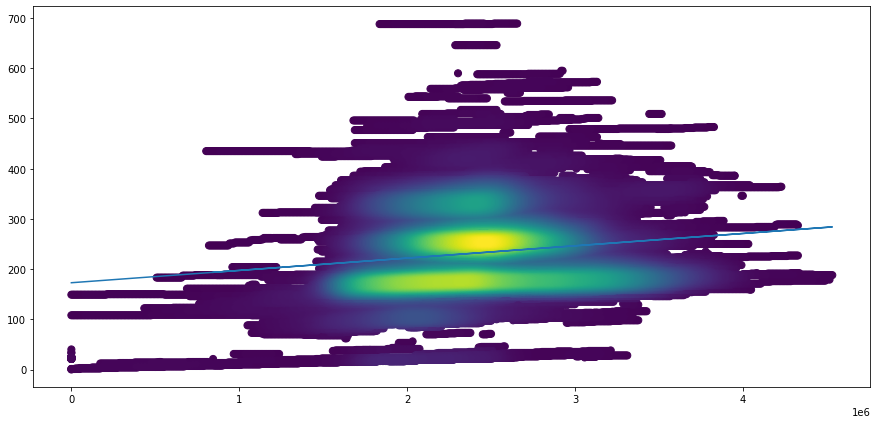

In [15]:
x = xd
y = yd

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
ax.plot(xd, yp)
plt.show()